
There are 2 Parts with a total 14 coding tasks in this assignment. 

* Part 1 (Tasks 1.1 through 1.7) Fully Connected Dense Network:

 
* Part 2 (Tasks 2.1 through 2.7) Convolutional Neural Network:






In [20]:
# !pip install tensorflow

In [21]:
##### DO NOT EDIT THIS CELL!!!
##### DO NOT IMPORT ANY ADDITIONAL PACKAGES

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# keras API documentation:
# https://www.tensorflow.org/api_docs/python/tf/keras
from tensorflow.keras import datasets # https://www.tensorflow.org/api_docs/python/tf/keras/datasets
from tensorflow.keras import layers # https://www.tensorflow.org/api_docs/python/tf/keras/layers
from tensorflow.keras import activations # https://www.tensorflow.org/api_docs/python/tf/keras/activations
from tensorflow.keras import initializers # https://www.tensorflow.org/api_docs/python/tf/keras/initializers
from tensorflow.keras import losses # https://www.tensorflow.org/api_docs/python/tf/keras/losses
from tensorflow.keras import metrics # https://www.tensorflow.org/api_docs/python/tf/keras/metrics
from tensorflow.keras import optimizers # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras import regularizers # https://www.tensorflow.org/api_docs/python/tf/keras/regularizers
from tensorflow.keras.optimizers import schedules # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules
from tensorflow.keras import callbacks # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
from tensorflow.keras import utils # https://www.tensorflow.org/api_docs/python/tf/keras/utils
from tensorflow.keras import models # https://www.tensorflow.org/api_docs/python/tf/keras/models

In [22]:
##### DO NOT EDIT THIS CELL!!!

# load the MNIST dataset
# - contains 70,000 grayscale images (handwritten digits)
# - images are low resolution (28 by 28 pixels)
# - 10 categories (labeled 0 through 9)
# - 60,000 images in train and 10,000 images in test

mnist = datasets.mnist

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = 10

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

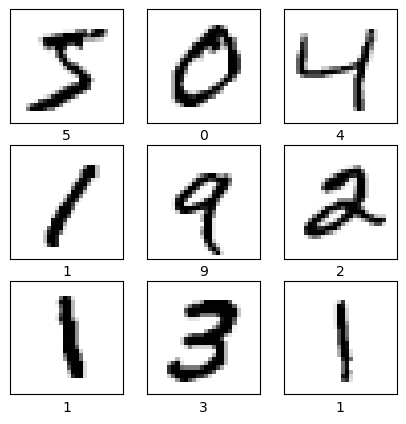

In [23]:
##### DO NOT EDIT THIS CELL!!!

# view a sample of 9 images from the training set
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Part-1: Fully Connected Dense Network

In [33]:
##### THIS IS CELL 1 (of 2) YOU WILL EDIT PER THE ISNTRUCTIONS BELOW

# CREATE model 
# a sequential model is appropriate for a plain stack of layers where each layer 
# has exactly one input tensor and one output tensor.
model = tf.keras.Sequential([
    
    # tell keras the input shape is (28, 28, 1); 
    # sample size is ommitted - only the shape of each sample is specified 
    tf.keras.Input(shape=(28, 28, 1)), 

    # preprocess images to lie in the range 0-1
    layers.experimental.preprocessing.Rescaling(1.0 / 255), 
    
    # Flatten the 2D (28 x 28 x 1) images to be 1D (28 * 28 * 1 = 784)
    ### (1.1) YOUR CODE HERE
    tf.keras.layers.Flatten(),
    
    # create Dense hidden layer 1 with 256 nodes (leave everything else at default values),
    # followed by BatchNormalization (leave everything at default values),
    # followed by ReLU Activation (leave everything else at default values)
    ### (1.2) YOUR CODE HERE
    tf.keras.layers.Dense(256), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # create Dense hidden layer 2 with 128 nodes (leave everything else at default values),
    # followed by BatchNormalization (leave everything at default values),
    # followed by ReLU Activation (leave everything else at default values)
    ### (1.3) YOUR CODE HERE
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # create Dense output layer with 10 nodes and Softmax activation (leave everything else at default values)
    ### (1.4) YOUR CODE HERE
    tf.keras.layers.Dense(10, activation='softmax')
    
])

# DISPLAY model architecture
# you should end up with total parameters 236,682  
# ensure you understand the number of parameters in each layer, 
# as well as total number of trainable and non-trainable parameters
model.summary()

# COMPILE model
model.compile(
    
    # use Adam optimizer with learning rate 0.001 (leave everything else at default values)
    ### (1.5) YOUR CODE HERE
    optimizer=optimizers.Adam(learning_rate=0.001),
    # use SparseCategoricalCrossentropy loss (leave everything at default values)
    ### (1.6) YOUR CODE HERE
    loss=losses.SparseCategoricalCrossentropy(),

    
    # track accuracy metric
    ### (1.7) YOUR CODE HERE
    metrics=['accuracy']
) 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 re_lu_6 (ReLU)              (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                      

In [26]:
%%time

##### DO NOT EDIT THIS CELL!!!

# TRAIN model 
# ensure you can explain the number of gradient descent steps in each epoch
history = model.fit(
    
    # training set images
    train_images, 
    
    # training set labels
    train_labels, 
    
    # number of epochs to train
    epochs=15,
    
    # mini-batch SGD batch size
    # if None, defaults to 32
    batch_size=128,
    
    # validation set - can use validation_split or validation_data
    validation_split=0.1,
) 

Epoch 1/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2270 - accuracy: 0.9354 - val_loss: 0.1002 - val_accuracy: 0.9703
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9750 - val_loss: 0.0829 - val_accuracy: 0.9753
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0699 - val_accuracy: 0.9802
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.0743 - val_accuracy: 0.9805
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0762 - val_accuracy: 0.9800
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0834 - val_accuracy: 0.9780
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0171 - accuracy: 0.9951 - val_loss: 0.0791 - val_accuracy: 0.9800
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


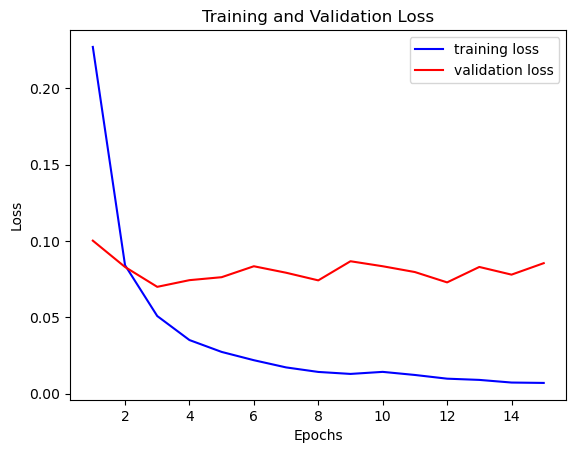

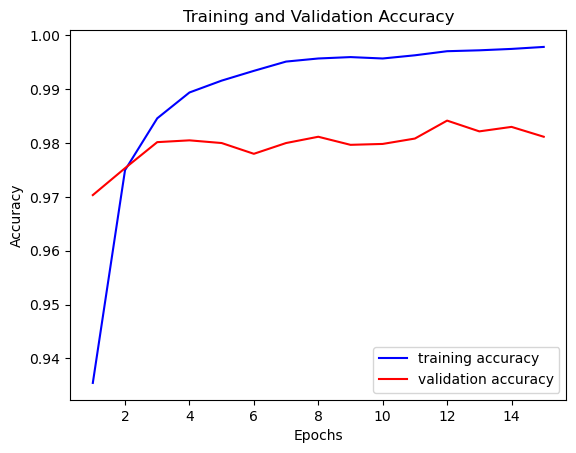

In [27]:
##### DO NOT EDIT THIS CELL!!!

# PLOT loss and accuracy for train and validation data

# model.fit() returns a History object that contains a dictionary with everything that happened during training
# we can use it to plot training/validation loss and training/validation accuracy
history_dict = history.history
print (history_dict.keys())

# plot loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
##### DO NOT EDIT THIS CELL!!!

# EVALUATE model
# you should end up with a test accuracy of ~0.97
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print ("\ntest set loss: ", round(test_loss,4), "\ntest set accuracy: ", round(test_acc,4))

313/313 - 0s - loss: 0.0773 - accuracy: 0.9788 - 130ms/epoch - 416us/step

test set loss:  0.0773 
test set accuracy:  0.9788


## Part-2: Convolutional Neural Network

In [29]:
##### THIS IS CELL 2 (of 2) YOU WILL EDIT PER THE ISNTRUCTIONS BELOW

# CREATE model 
# a sequential model is appropriate for a plain stack of layers where each layer 
# has exactly one input tensor and one output tensor.
model = tf.keras.Sequential([
    
    # tell keras the input shape is (28, 28, 1); 
    # sample size is ommitted - only the shape of each sample is specified 
    tf.keras.Input(shape=(28, 28, 1)), 

    # preprocess images to lie in the range 0-1
    layers.experimental.preprocessing.Rescaling(1.0 / 255), 
    
    # create 2 pairs of convolutional-pooling layers as below (leave everything else at default values)
    #  - Conv2D: 32 filters, kernel size (3,3), strides (1,1), valid padding, relu activation
    #  - MaxPool2D: pool size (2,2), strides (2,2)
    #  - Conv2D: 64 filters, kernel size (3,3), strides (1,1), valid padding, relu activation
    #  - MaxPool2D: pool size (2,2), strides (2,2)
    ### (2.1) YOUR CODE HERE
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Flatten to get output ready for fully connected layer (leave everything at default values)
    ### (2.2) YOUR CODE HERE
    layers.Flatten(),
    # use Dropout with drop rate of 0.5 (leave everything else at default values)
    ### (2.3) YOUR CODE HERE
    layers.Dropout(0.5),
    # create Dense output layer with 10 nodes and Softmax activation (leave everything else at default values)
    ### (2.4) YOUR CODE HERE
    layers.Dense(10, activation='softmax')
])

# DISPLAY model architecture
# you should end up with total parameters 34,826  
# ensure you understand the number of parameters in each layer, 
# as well as total number of trainable and non-trainable parameters
model.summary()

# COMPILE model
model.compile(
    
    # use Adam optimizer with learning rate 0.001 (leave everything else at default values)
    ### (2.5) YOUR CODE HERE
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    # use SparseCategoricalCrossentropy loss (leave everything at default values)
    ### (2.6) YOUR CODE HERE
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # track accuracy metric
    ### (2.7) YOUR CODE HERE
    metrics=['accuracy']
) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)             

In [30]:
%%time

##### DO NOT EDIT THIS CELL!!!

# TRAIN model 
# ensure you can explain the number of gradient descent steps in each epoch
history = model.fit(
    
    # training set images
    train_images, 
    
    # training set labels
    train_labels, 
    
    # number of epochs to train
    epochs=15,
    
    # mini-batch SGD batch size
    # if None, defaults to 32
    batch_size=128,
    
    # validation set - can use validation_split or validation_data
    validation_split=0.1,
) 

Epoch 1/15
422/422 [==============================] - 7s 16ms/step - loss: 0.3816 - accuracy: 0.8827 - val_loss: 0.0850 - val_accuracy: 0.9753
Epoch 2/15
422/422 [==============================] - 6s 14ms/step - loss: 0.1167 - accuracy: 0.9644 - val_loss: 0.0577 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0873 - accuracy: 0.9727 - val_loss: 0.0492 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0708 - accuracy: 0.9791 - val_loss: 0.0439 - val_accuracy: 0.9875
Epoch 5/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0619 - accuracy: 0.9811 - val_loss: 0.0390 - val_accuracy: 0.9883
Epoch 6/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0548 - accuracy: 0.9829 - val_loss: 0.0393 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0506 - accuracy: 0.9838 - val_loss: 0.0369 - val_accuracy: 0.9897

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


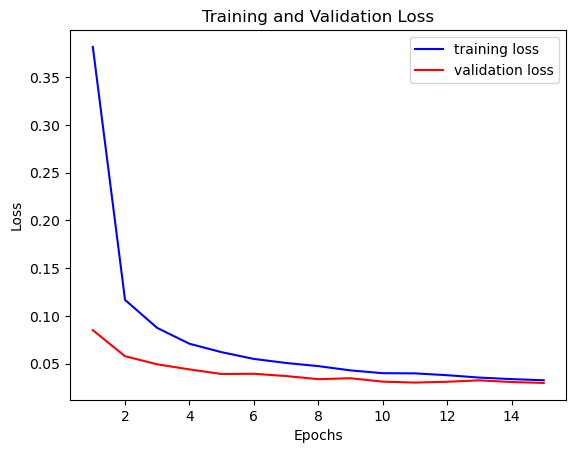

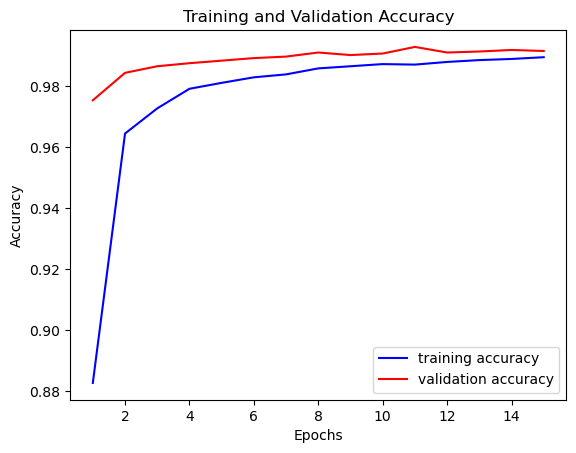

In [31]:
##### DO NOT EDIT THIS CELL!!!

# PLOT loss and accuracy for train and validation data

# model.fit() returns a History object that contains a dictionary with everything that happened during training
# we can use it to plot training/validation loss and training/validation accuracy
history_dict = history.history
print (history_dict.keys())

# plot loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
##### DO NOT EDIT THIS CELL!!!

# EVALUATE model
# you should end up with a test accuracy of ~0.99
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print ("\ntest set loss: ", round(test_loss,4), "\ntest set accuracy: ", round(test_acc,4))

313/313 - 0s - loss: 0.0261 - accuracy: 0.9910 - 387ms/epoch - 1ms/step

test set loss:  0.0261 
test set accuracy:  0.991
